In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

In [145]:
con = sqlite3.connect(r'C:\Users\hello\Desktop\Projects\Amazon/database.sqlite')

In [146]:
df = pd.read_sql_query('SELECT * FROM Reviews', con)

In [147]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [148]:
df.shape

(568454, 10)

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568454 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568454 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [150]:
df['Time'] = pd.to_datetime(df['Time'],unit = 's')

In [151]:
df['Time'].dt.year.unique()

array([2011, 2012, 2008, 2005, 2010, 2009, 2006, 2007, 2004, 2000, 2003,
       2002, 2001, 1999])

In [152]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


Remove invalid data

In [153]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [154]:
df = df[df['HelpfulnessNumerator']<=df['HelpfulnessDenominator']]

In [155]:
df.shape

(568452, 10)

Remove duplicated value

In [156]:
df.duplicated(['UserId', 'ProfileName', 'Time']).sum()

215668

In [157]:
df.drop_duplicates(['UserId', 'ProfileName', 'Time'],inplace= True)

In [158]:
df.shape

(352784, 10)

**Data Analysis**

Top buyers

In [159]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [160]:
df_top10_buyer = df.groupby(['UserId'], as_index=False).size().sort_values(by = 'size', ascending=False).nlargest(10,'size')

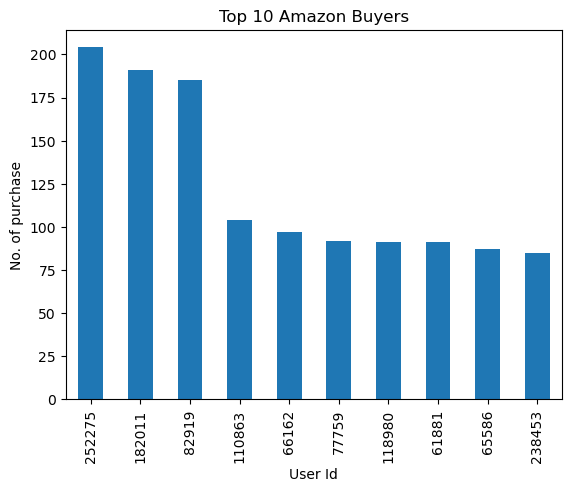

In [161]:
df_top10_buyer.plot(kind = 'bar')
plt.title('Top 10 Amazon Buyers')
plt.ylabel('No. of purchase')
plt.xlabel('User Id')
plt.legend().remove()

Popular products

In [162]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...


In [163]:
df_pop_prod = df.groupby('ProductId', as_index=False).agg({'Score':'mean',
                                             'Summary':'count'}).sort_values(by = 'Summary', 
                                                                             ascending= False).head(10)

In [164]:
df_pop_prod

,ProductId,Score,Summary
61382,B007JFMH8M,4.601790,894
36729,B002QWP89S,4.599034,621
40103,B003B3OOPA,4.739437,568
12573,B000KV61FC,3.409747,554
20322,B0013NUGDE,4.318761,549
24910,B001EO5Q64,4.746692,529
63499,B0090X8IPM,3.807322,519
17219,B000UBD88A,4.357143,504
58478,B005ZBZLT4,4.372709,491
57159,B005K4Q37A,3.783231,489


In [165]:
df_pop_prod.columns = ['Product_Id', 'Avg_Score', 'No_of_purchased']

(0.0, 5.0)

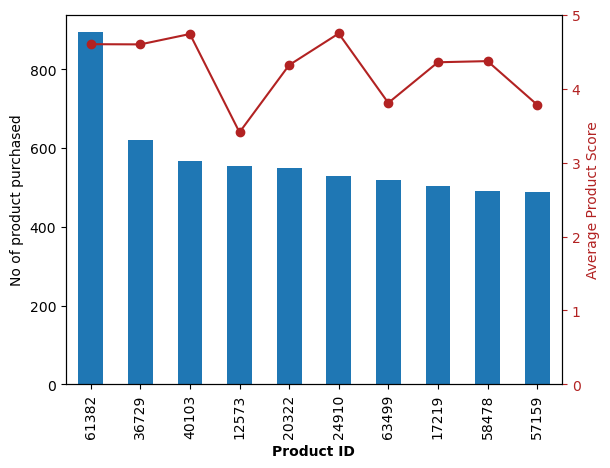

In [166]:
ax1 = df_pop_prod['No_of_purchased'].plot(kind = 'bar')
ax1.set_ylabel('No of product purchased')
ax1.set_xlabel('Product ID', fontweight = 'bold')

ax2 = ax1.twinx()

ax2.plot(df_pop_prod['Product_Id'],df_pop_prod['Avg_Score'], color = 'firebrick', marker = 'o')
ax2.tick_params(axis = 'y', colors = 'firebrick')
ax2.set_ylabel('Average Product Score', color = 'firebrick')
ax2.set_ylim(0,5)

Are there different consumer behaviours between frequent and non-frequent customers?

In [167]:
df_group_cus = df.groupby(['UserId'], as_index=False).size().sort_values(by = 'size', ascending=False)

In [168]:
cus_counts = df['UserId'].value_counts()

In [169]:
df['Freq_Cus'] = df['UserId'].apply(lambda user: 'Y' if cus_counts[user]>=50 else 'N')


In [170]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Freq_Cus
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,N
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,N
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,N
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,N
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,N


In [171]:
df['Freq_Cus'].value_counts()

Freq_Cus
N    348590
Y      4194
Name: count, dtype: int64

In [172]:
df_cus_score = pd.crosstab(index = df['Score'], columns=df['Freq_Cus'])

In [173]:
df_cus_score['N'] = df_cus_score['N']/sum(df_cus_score['N'])*100

In [174]:
df_cus_score['Y'] = df_cus_score['Y']/sum(df_cus_score['Y'])*100

In [175]:
df_cus_score

Freq_Cus,N,Y
Score,,
1,9.670386,3.576538
2,5.359305,3.576538
3,7.397229,9.585122
4,13.778938,22.007630
5,63.794142,61.254173


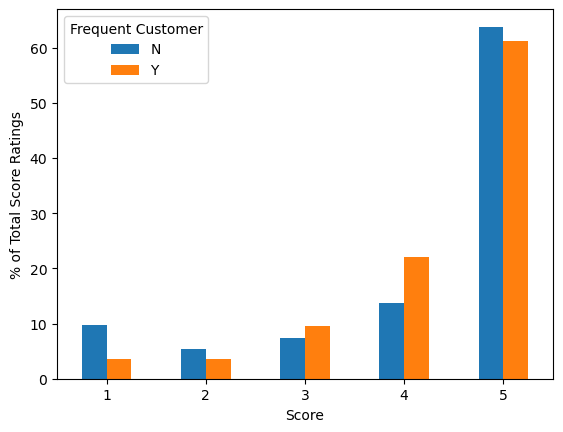

In [176]:
df_cus_score.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('% of Total Score Ratings')
plt.xlabel('Score')
plt.legend(title = 'Frequent Customer')

In [177]:
## Based on the bar chart above, there doesn't seem to be obvious relation between score rating % and purchase frequency

Are frequent buyers more verbose?

In [178]:
len(df['Text'][0].split(' '))

49

In [179]:
def count_words(text):
    return len(text.split(' '))

In [180]:
df['Text_Length'] = df['Text'].apply(count_words)

In [181]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Freq_Cus,Text_Length
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,N,49
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,N,31
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,N,99
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,N,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,N,30


Text(0.5, 1.0, 'Distribution of Customers Review Word Counts')

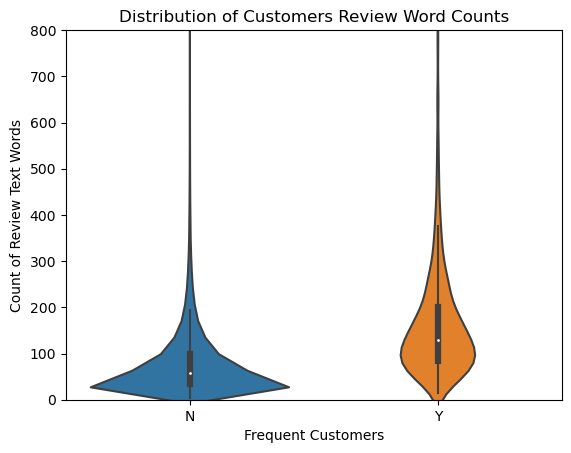

In [182]:
ax = sns.violinplot(x = 'Freq_Cus', y = 'Text_Length', data = df)
ax.set_ylim(0,800)
ax.set_xlabel('Frequent Customers')
ax.set_ylabel('Count of Review Text Words')
ax.set_title('Distribution of Customers Review Word Counts')

In [183]:
## Non-Frequent customerss tend to give shorter views 
## While the distribution of review word count is more even among frequent customers,most commonly around 100 words

Sentiment Analysis

In [184]:
from textblob import TextBlob

In [185]:
TextBlob(df['Summary'][0]).sentiment.polarity

0.7

In [186]:
def sentiment_score(text):
    return TextBlob(text).sentiment.polarity

In [187]:
df['Sentiment_Score'] = df['Text'].apply(sentiment_score)

In [188]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Freq_Cus,Text_Length,Sentiment_Score
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,N,49,0.450000
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,N,31,-0.033333
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,N,99,0.133571
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,N,43,0.166667
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,N,30,0.483333


In [189]:
def sentiment_group(num):
    if num >0: return 'Y'
    elif num<0: return 'N'
    else: return 'NA'

In [190]:
df['Positive_Feedback'] = df['Sentiment_Score'].apply(sentiment_group)

In [191]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Freq_Cus,Text_Length,Sentiment_Score,Positive_Feedback
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,N,49,0.450000,Y
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,N,31,-0.033333,N
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,N,99,0.133571,Y
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,N,43,0.166667,Y
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,N,30,0.483333,Y


In [192]:
df_pos_fb = df[df['Positive_Feedback']=='Y']
df_neg_fb = df[df['Positive_Feedback']=='N']

In [193]:
from collections import Counter

In [198]:
Counter(df_pos_fb['Summary']).most_common(10)

[('Delicious!', 1537),
 ('Delicious', 1458),
 ('Yummy!', 951),
 ('Yummy', 799),
 ('Yum!', 669),
 ('Great product', 652),
 ('Excellent', 615),
 ('Great Product', 561),
 ('Love it!', 553),
 ('Great!', 453)]

In [199]:
Counter(df_neg_fb['Summary']).most_common(10)

[('Disappointed', 169),
 ('Disappointing', 82),
 ('Yuck!', 78),
 ('Awful', 75),
 ('Terrible', 66),
 ('Horrible', 63),
 ('Yuck', 56),
 ('Disgusting', 51),
 ('disappointed', 51),
 ('Delicious', 39)]

Total purchase over time

In [200]:
df['Year'] =df['Time'].dt.year

In [201]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Freq_Cus,Text_Length,Sentiment_Score,Positive_Feedback,Year
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,I have bought several of the Vitality canned d...,N,49,0.450000,Y,2011
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,N,31,-0.033333,N,2012
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",This is a confection that has been around a fe...,N,99,0.133571,Y,2008
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,If you are looking for the secret ingredient i...,N,43,0.166667,Y,2011
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,Great taffy at a great price. There was a wid...,N,30,0.483333,Y,2012


In [205]:
df_year = df.groupby('Year', as_index=False).size()

In [212]:
df_year['Increase_Pct'] =df_year['size'].pct_change()*100

In [215]:
df_year

,Year,size,Increase_Pct
0,1999,4,NaN
1,2000,15,275.000000
2,2001,8,-46.666667
3,2002,33,312.500000
4,2003,88,166.666667
5,2004,401,355.681818
6,2005,978,143.890274
7,2006,4294,339.059305
8,2007,14175,230.111784
9,2008,20997,48.126984


Text(0.5, 1.0, 'Amazon Annual Purchase Change From 1999-2012')

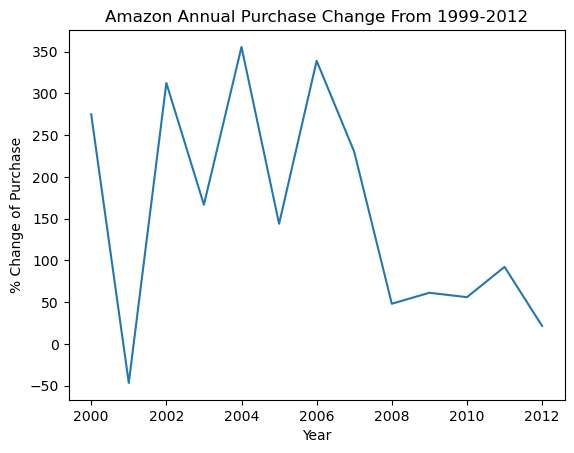

In [214]:
plt.plot(df_year['Year'], df_year['Increase_Pct'])
plt.xlabel('Year')
plt.ylabel('% Change of Purchase')
plt.title('Amazon Annual Purchase Change From 1999-2012')

In [ ]:
## Except 2001, Amazon has seen a continous purchase increase in over a decade, with peak increase (ca. 350%)) in 2004